In [1]:
!pip install tensorflow matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shapes of the data
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 54s 0us/step
Shape of training data: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of testing data: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Print the shapes of the data
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 51s 0us/step
Shape of training data: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of testing data: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)


In [4]:
# Import necessary libraries for data processing
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
# Note the change from 10 to 100 for the number of classes
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Print the shapes after processing to verify the changes
print(f"Shape of training data after normalization: {x_train.shape}")
print(f"Shape of training labels after one-hot encoding: {y_train.shape}")

Shape of training data after normalization: (50000, 32, 32, 3)
Shape of training labels after one-hot encoding: (50000, 100)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),

    # Flattening the 3D output to 1D for the Dense layers
    Flatten(),

    # Dense layers for classification
    Dense(64, activation='relu'),
    Dense(100, activation='softmax') # 100 is the number of classes in CIFAR-100
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 80ms/step - accuracy: 0.0467 - loss: 4.3050 - val_accuracy: 0.1599 - val_loss: 3.5728
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.1784 - loss: 3.4211 - val_accuracy: 0.2280 - val_loss: 3.1746
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.2493 - loss: 3.0490 - val_accuracy: 0.2626 - val_loss: 2.9828
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.2879 - loss: 2.8499 - val_accuracy: 0.2823 - val_loss: 2.9105
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.3239 - loss: 2.7000 - val_accuracy: 0.3026 - val_loss: 2.8332
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.3445 - loss: 2.5846 - val_accuracy: 0.3092 - val_loss: 2.7925
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.3658 - loss: 2.4806 - val_accuracy: 0.3385 - val_loss: 2.6254
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.3805 - loss: 2.3984 - 

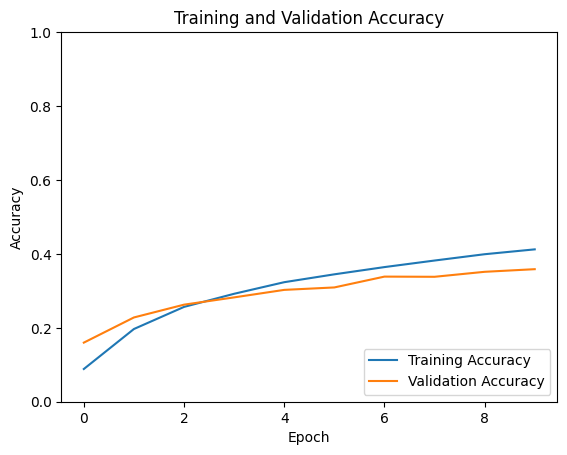

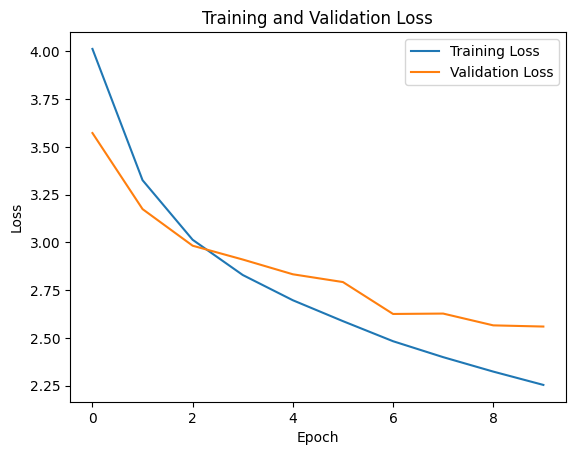

In [6]:
# Train the model
# epochs=10 means the model will go through the entire training data 10 times
# batch_size=64 means the model will update its parameters every 64 images
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Plot training and validation accuracy to visualize performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


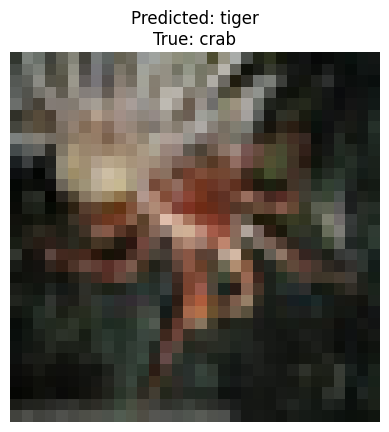

The model predicted: tiger
The true label is: crab


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 100 class names for the CIFAR-100 dataset
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# Pick a random image from the test set
# Replace the number `100` with any number from 0 to 9999 to test a different image
test_image_index = 100
sample_image = x_test[test_image_index]
true_label = np.argmax(y_test[test_image_index])
true_class_name = class_names[true_label]

# Make a prediction using the model
sample_image_reshaped = np.expand_dims(sample_image, axis=0)
prediction = model.predict(sample_image_reshaped)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_names[predicted_class_index]

# Display the image and the prediction result
plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class_name}\nTrue: {true_class_name}")
plt.axis('off')
plt.show()

print(f"The model predicted: {predicted_class_name}")
print(f"The true label is: {true_class_name}")